Python for Data Analysis, Vilnius University, 2024

# HW2: working with Numpy and Pandas

Instructions are the same as for HW1. There are some `assert` statements, but they only check for basic and obvious errors.

There are 25 points to collect (5 per task), and one bonus task with 4 points.

**Do not import any libraries except for the ones imported in the code cell below**.

Don't hesitate to contact me or Martynas if you are stuck.

In [1]:
import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# !pip install seaborn
import seaborn as sns

## Task 1: Load and examine the data

The Snail lab needs your help again. They have sent you a data file about plants edible by snails, with the name "plantdata.npy". You need to correctly load it into Python and examine it to see if the data looks good.

```bash
!wget https://github.com/Tallivm/vu-python/raw/refs/heads/main/plantdata.npy
```

- ❗️*(1 point)* Load "plantdata.npy" into notebook using the `np.load()` function. Name the loaded array as `raw_data`.
- ❗️*(1 point)* Print out the shape and type of data.
- ❗️*(1 point)* Calculate and save the total number of missing values (NaNs) in `raw_data` into a new variable `n_missing`.
- ❗️*(2 points)* For each data column, print out the minimum, average, median, and maximum values. *Do not use Pandas functions yet.*

In [2]:
# code
import requests #I use this importation because wget function not working for me 
url = 'https://github.com/Tallivm/vu-python/raw/refs/heads/main/plantdata.npy'
response = requests.get(url)
with open('plantdata.npy', 'rb') as file:
    data = file.read()
raw_data = np.load('plantdata.npy')

print(raw_data)
print(raw_data.shape)
print(type(raw_data))

n_missing = np.isnan(raw_data).sum()
print(n_missing)


for i in range(raw_data.shape[1]):
    column = raw_data[:, i]
    column_cleaned = column[~np.isnan(column)] 
    minimum = np.min(column_cleaned)
    maximum = np.max(column_cleaned)
    average = np.mean(column_cleaned)
    median = np.median(column_cleaned)

print(f"Column {i}:")
print(f"  Minimum: {minimum}")
print(f"  Average: {average}")
print(f"  Median: {median}")
print(f"  Maximum: {maximum}") 

[[9.41000000e+01 3.00000000e-01 1.42000000e+02 ... 2.30000000e+00
  2.30181028e+01 7.05942576e+00]
 [1.09400000e+02 1.00000000e-01 1.38000000e+02 ... 9.00000000e-01
  8.86022843e+00 2.94636232e+00]
 [8.72000000e+01 4.00000000e-01 1.17000000e+02 ... 4.00000000e-01
  4.16375095e+00 1.17932854e+00]
 ...
 [1.03600000e+02 2.00000000e-01 1.35000000e+02 ... 1.60000000e+00
  1.57373750e+01 4.48979110e+00]
 [1.15800000e+02 2.00000000e-01 1.41000000e+02 ... 1.60000000e+00
  1.60109638e+01 5.29007045e+00]
 [1.19300000e+02 1.00000000e-01 1.21000000e+02 ... 1.50000000e+00
  1.48038238e+01 4.32911361e+00]]
(15434, 12)
<class 'numpy.ndarray'>
20873
Column 11:
  Minimum: 0.0
  Average: 4.582037803839972
  Median: 3.684335855678124
  Maximum: 28.12385211008675


In [3]:
assert type(raw_data) == np.ndarray
assert n_missing == 20873

## Task 2. Making data convenient to work with

Because the dataset is a table, it will be much easier to work with it using Pandas. Create a DataFrame containing data from the Numpy array. Name it `raw_df`.

- ❗ *(4 points)* Download the data sheet which is in JSON format. Inside you will find the names of each column (in the same order), as well as some mapping for categorical values to convert to readable strings. Load the data sheet using JSON into a new variable  `datasheet`, and use it to change the names of `raw_df` columns. Then, use it to replace some numerical values in categorical columns into strings. To download the data sheet, run:
```bash
!wget https://raw.githubusercontent.com/Tallivm/vu-python/refs/heads/main/plant_datasheet.json
```
- ❗ *(1 point)* Count and print out the number of red flowers with either ovate smooth or reniform waxy leaves. Save it into a variable `n_certain_red_flowers`.


In [4]:
# code
raw_df = pd.DataFrame(raw_data)
url = "https://raw.githubusercontent.com/Tallivm/vu-python/refs/heads/main/plant_datasheet.json"
response = requests.get(url)

with open("plant_datasheet.json", "wb") as file:
    file.write(response.content)
    # print("JSON file downloaded successfully.")

with open ("plant_datasheet.json", "r") as f:
    datasheet = json.load(f)
    print(datasheet)
    
    columns_names = datasheet['column names']
    raw_df.columns = columns_names
    print(raw_df)
for column, mapping in datasheet['mapping'].items():
    raw_df[column] = raw_df[column].map({v: k for k, v in mapping.items()})
    
n_certain_red_flowers = len(raw_df[(raw_df['petal_color'] == 'red') &
                                   ((raw_df['leaf_shape_type'] == 'ovate') & (raw_df['leaf_surface_type'] == 'smooth') |
                                    (raw_df['leaf_shape_type'] == 'reniform') & (raw_df['leaf_surface_type'] == 'waxy'))])
print(f'Specific red flowers number:{n_certain_red_flowers}')
    

{'column names': ['plant_height', 'stem_bending', 'leaf_size', 'leaf_shape_type', 'leaf_surface_type', 'flower_radius', 'n_petals', 'petal_size', 'petal_color', 'snail_age', 'snail_body_length', 'snail_eye_length'], 'mapping': {'leaf_shape_type': {'cordate': 0, 'ovate': 1, 'elliptical': 2, 'lanceolate': 3, 'reniform': 4}, 'leaf_surface_type': {'smooth': 0, 'hairy': 1, 'waxy': 2}, 'petal_color': {'white': 0, 'red': 1, 'yellow': 2, 'blue': 3, 'purple': 4}}}
       plant_height  stem_bending  leaf_size  leaf_shape_type  \
0              94.1           0.3      142.0              3.0   
1             109.4           0.1      138.0              2.0   
2              87.2           0.4      117.0              0.0   
3             106.2           0.2      151.0              1.0   
4             103.1           0.2      115.0              0.0   
...             ...           ...        ...              ...   
15429          91.1           0.3      187.0              0.0   
15430          84.4 

In [5]:
assert type(raw_df) == pd.DataFrame
assert type(datasheet) == dict
assert raw_df.columns[0] == 'plant_height'
assert raw_df.loc[1, 'petal_color'] == 'red'
assert n_certain_red_flowers == 201

## Task 3. Detecting problematic values

- ❗ *(1 point)* Print out the number of NaNs for each column, using a Pandas function.
- ❗ *(1 point)* Create a new DataFrame `numeric_df` containing only numerical columns from `raw_df` (with integer and float types). *You cannot write the names of numerical columns by hand, please write an automated solution.*
- ❗ *(1 point)* Plot and show a **boxplot** for each numerical feature.
- ❗ *(2 points)* Using the approach described in theory slides (week 6, "Finding outliers" slide), count and print out the number of outliers in each numerical column. Save the total number of outliers into a variable `n_outliers_total` (should be an integer).

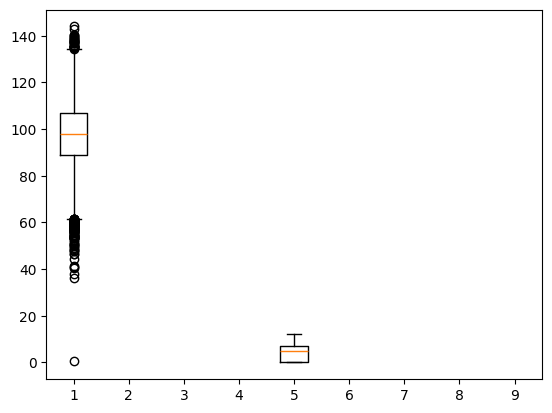

Number of outliers in each column: 
plant_height          148
stem_bending            6
leaf_size             130
flower_radius          65
n_petals                0
petal_size             36
snail_age            2386
snail_body_length     577
snail_eye_length      569
dtype: int64
Total number of outliers: 3917


In [9]:
# code
raw_df.isna()
numeric_df = raw_df.select_dtypes([int, float]) 
fig, ax = plt.subplots()
ax.boxplot(numeric_df)
plt.show()

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()
n_outliers_total = outliers.sum()

print(f"Number of outliers in each column: \n{outliers}")
print(f"Total number of outliers: {n_outliers_total}")

In [7]:
assert len(numeric_df.columns) == 9
assert n_outliers_total == 3917

## Task 4. Data cleaning

The `snail_age` column certainly looks strange. Some data cleaning may be needed. After sending the initial analysis to the researcher from the Snail lab and asking how to interpret missing values and outliers, they responded with some additional information:
- The data array was collected by several independent biologists. Some of them recorded snail age in years, and some in days. It should be possible to distinguish between year and day values using common sense (snails normally live up to 10-15 years). In the clean data, the lab wants to have all ages in years.
- Body length was measured from the tip of snail's tail to the tip of the right eye tentacle. Snails should not have eyes longer than a half of their body.
- Some (not all!) missing values are present in the data because the researcher forgot to make a measurement. All samples containing such missing values should be removed.

Based on these facts, you need to decide which values are errogenous and should be corrected (if possible) or removed.

Make a copy of `raw_df` and name it `clean_df`. Only make changes in this new DataFrame - the old one should remain unchanged.

- ❗*(1 point)* Remove rows with errogenous "snail_body_length" or "snail_eye_length" values.
- ❗*(2 points)* Find "snail_age" values which were obviously recorded in days, and convert them into years.
- ❗*(2 points)* Explore the NaN values in data. Most NaNs should not be removed and instead replaced with zeros or a similar constant. Other NaNs cannot be replaced and the whole sample should be removed. Write a comment explaining how you made your decision which NaNs should be removed and which should be replaced.

In [ ]:
# code

In [ ]:
assert list(raw_df.columns) == list(clean_df.columns)
assert len(raw_df) > len(clean_df)
assert clean_df.isnull().sum().sum() == 0

## Task 5. Data visualization

The Snail lab asked you for several publication-ready data visualizations. Use Matplotlib and Seaborn to create beautiful and descriptive plots.

- ❗ *(3 points)* For each feature in `clean_df`, plot either a histogram or a barplot (depending on whether the feature is numerical).
  - Each feature should have its own plot with a corresponding title (feature name), and all plots should be in a single figure with 3 rows and 4 columns.
  - For numerical features, add a red dashed vertical line to each plot which shows *average* of the corresponding feature, and a green dashed vertical line which shows *median*.

- ❗ *(2 points)* Calculate Spearman's correlation coefficients between all numerical features. Plot a heatmap of these coefficients.
  - The heatmap should have visible values (rounded to two digits after floating point), feature names, and a colorbar.
  - Use a [diverging](https://matplotlib.org/stable/users/explain/colors/colormaps.html#diverging) colormap, and suitable values for `vmin` and `vmax` parameters, so that the zero correlation is in the middle of the colorbar.
  - The title of the figure should be "Spearman correlation between features".

In [ ]:
# code

## Bonus: Task 6. More statistics

The Snail lab submitted beautiful graphs for publication. However, reviewers noted that there is not enough data statistics. Due to a lack of time to do normality tests and test other assumptions, bootstrapping was chosen as a good way to estimate the real parameters of every variable.
- ❕ *(bonus 3 points)* Write a function that performs boostraping using the Monte Carlo method (google it!) only using `Numpy`. This function should return the resampled means, and have the number of resamples included as a parameter.
- ❕ *(bonus 1 point)* Add an option to instead calculate the median and interquartile range (*non-parametric*). Visualize plots from Task 5 again, now including these new parameters. How do they compare? How many resamples provide a smooth distribution?

In [ ]:
# code